In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import shap

train_columns = [
     'right',
     'up',
     'local_right',
     'local_up',
     'angle',
     'hull_top',
     'hull_bottom',
     'centrality',
     'avg_pass_length',
     'avg_pass_angle',
     'avg_receival_angle',
     'def_actions',
     'min_hull_left',
     'min_hull_right',
     'y_deviation',
     'x_deviation',
     'up_defensive',
     'right_defensive'
]

df = pd.read_csv('../3_merge_features_and_positions/data/data.csv')

X = df[train_columns]
y = df[['position']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

with open('brain.xgb', 'rb') as handle:
    model = pickle.load(handle) 

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

model.classes_

array(['CB', 'CM', 'LB', 'LW', 'RB', 'RW', 'ST'], dtype=object)

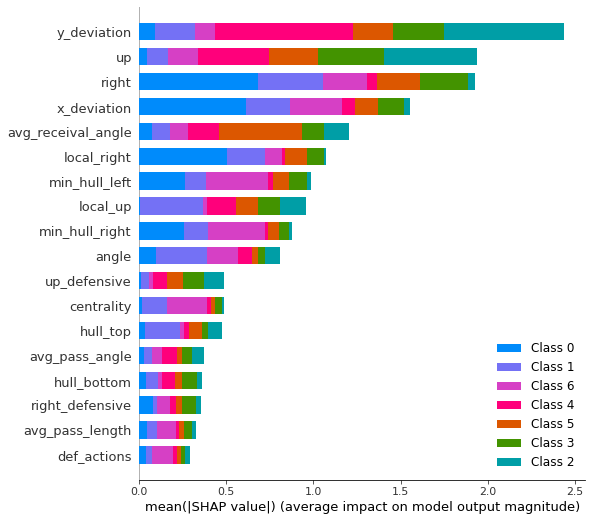

In [3]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

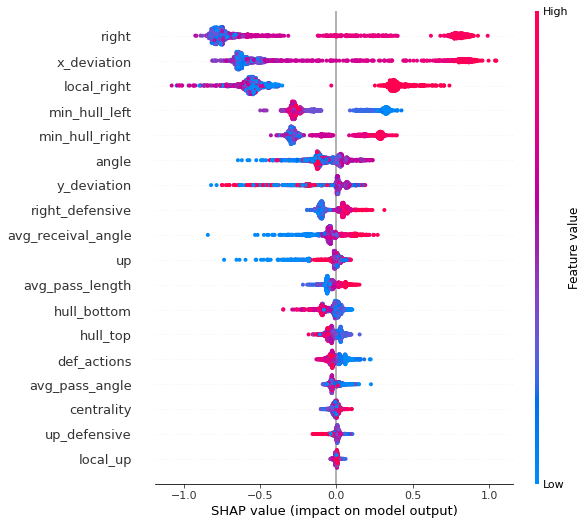

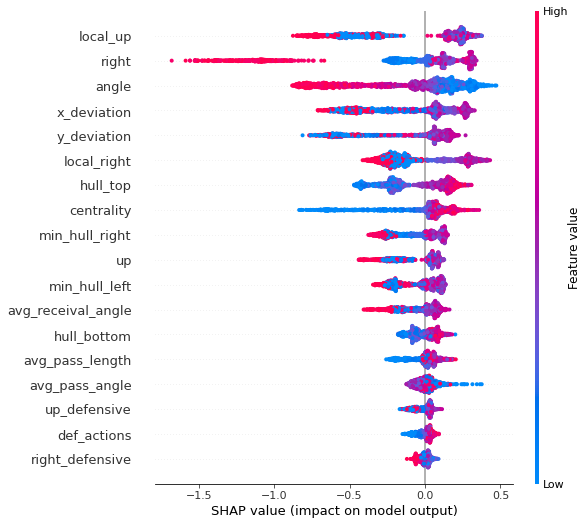

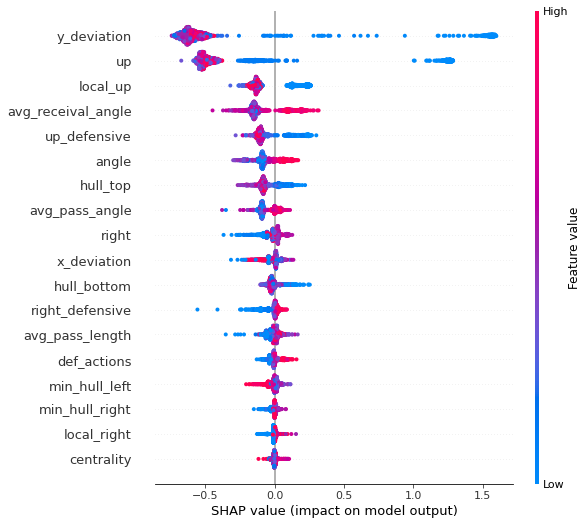

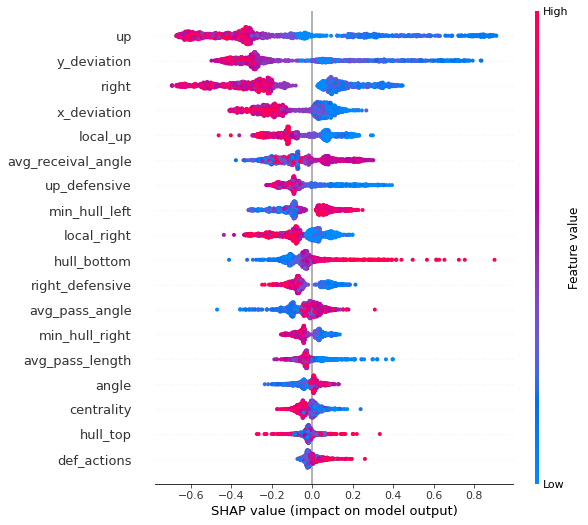

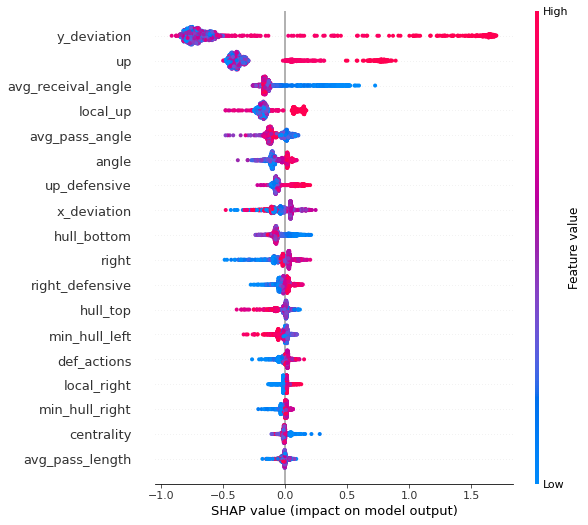

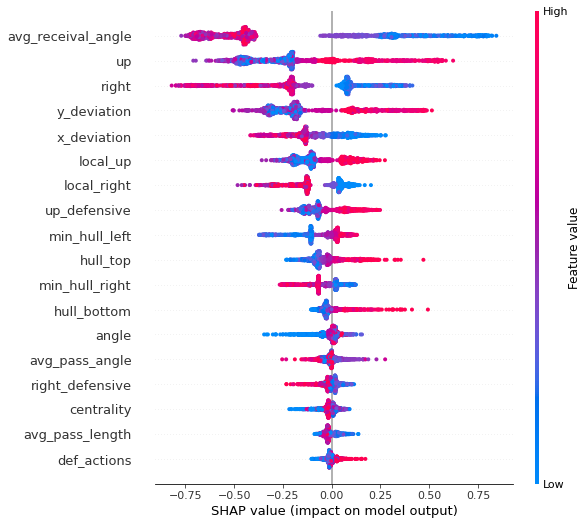

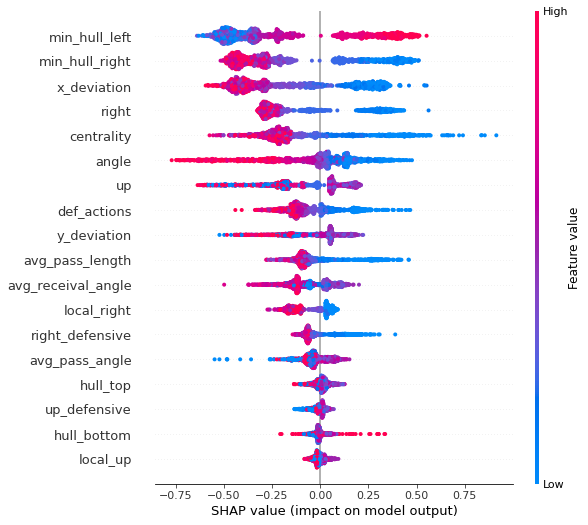

In [8]:
for val in shap_values:
    shap.summary_plot(val, X_test)

In [10]:
sample = X_test.sample(random_state=86)
single_explainer = shap.TreeExplainer(model)
single_shap_values = single_explainer.shap_values(sample)

shap.initjs()
for i in range(0, 7):
    display(shap.force_plot(single_explainer.expected_value[i], single_shap_values[i], sample))

# res = pd.concat([pd.DataFrame(data=single_shap_values[0], columns=X_test.columns, index=[0]),
#                  pd.DataFrame(data=single_shap_values[1], columns=X_test.columns, index=[1]),
#                  pd.DataFrame(data=single_shap_values[2], columns=X_test.columns, index=[2]),
#                  pd.DataFrame(data=single_shap_values[3], columns=X_test.columns, index=[3]),
#                  pd.DataFrame(data=single_shap_values[4], columns=X_test.columns, index=[4])])